### ==========================================================================================
# PART 2: COVNET MODEL ARCHITECTURE EXPLORATION
### ==========================================================================================

In [1]:
import os
import tensorflow as tf
from datetime import datetime
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
# project folder
path_project = 'E:/DeepLearning/breast_cancer/IDC_regular_ps50_idx5/'

# set train, validate, and test folders
dir_train = os.path.join(path_project, '_train')
dir_valid = os.path.join(path_project, '_validate')

### Ensure Tensorflow is running on GPU

In [3]:
# CMD window outout must be: Device mapping /job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce GTX1080Ti
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

### Function to train model

In [4]:
def train_model(model_x, lr, epochs, epoch_steps, valid_steps, batch_size, image_size):
    model = model_x(lr=lr, image_size=image_size)
    
    print('Model:', model_x)
    print('Batch Size:', batch_size)
    print('Learning Rate:', lr)
    print('Epochs:', epochs)
    print('Steps per Epoch:', epoch_steps)
    print('Validation Steps:', valid_steps)
    print('Image Size:', image_size)
    print('_' * 65, '\n')
        
    print('Training Set:')    
    datagen_train = ImageDataGenerator(rescale=1./255)
    gen_train = datagen_train.flow_from_directory(dir_train, target_size=image_size, batch_size=batch_size, class_mode='binary')
    
    print('Validation Set:')    
    datagen_valid = ImageDataGenerator(rescale=1./255)
    gen_valid = datagen_valid.flow_from_directory(dir_valid, target_size=image_size, batch_size=batch_size, class_mode='binary')
    print('_' * 65, '\n')

    print('Model training started...\n')
    
    t0 = datetime.now()
    with tf.device('/gpu:0'):
        history = model.fit_generator(gen_train, steps_per_epoch=epoch_steps, epochs=epochs, validation_data=gen_valid, 
                                                                                                validation_steps=valid_steps)
    
    elpased_time = str(datetime.now() - t0).split('.')[0]    
    hours = elpased_time.split(':')[0]
    minutes = elpased_time.split(':')[1]
    seconds = elpased_time.split(':')[2]
    
    print('\nTraining process completed in:', int(hours), 'h', int(minutes), 'm', int(seconds), 's')            
    
    # save model
    models_folder = 'MODELS'    
    if not os.path.exists(os.path.join(path_project, models_folder)):
        os.makedirs(os.path.join(path_project, models_folder))
    filename = f"model_breast_cancer_{row.Index}.h5"
    model.save(os.path.join(path_project, models_folder, filename))
    print('Model saved as: "', models_folder, '/', filename, '"')
    
    print('#' * 120, '\n')
    
    return (history, elpased_time, model)

### Function to plot model training results

In [5]:
def plot_training(acc, val_acc, loss, val_loss):
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

### MODEL 1 ---------------------------------------------------------

#### Define model architecture

In [6]:
def model_1(lr, image_size):
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    
    model.add(Flatten())
    
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=lr), metrics=['acc'])        
    model.summary()    
    return model

#### Initialize and train model

In [ ]:
logs = train_model(model_1, lr=0.01, epochs=20, epoch_steps=20, valid_steps=20, batch_size=50, image_size=(50, 50))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 135424)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               17334400  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 17,353,921
Trainable params: 17,353,921
Non-trainable params: 0
_________________________________________________________________
Model: <function model_1 at 0x000001E0D5C4CC80>
Batch Size: 20
Learning Rate: 0.01
Epochs: 20
Steps per Epoch: 20
Validation Steps

#### Plot model training history

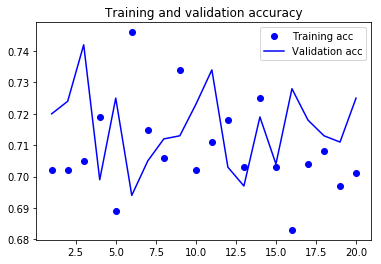

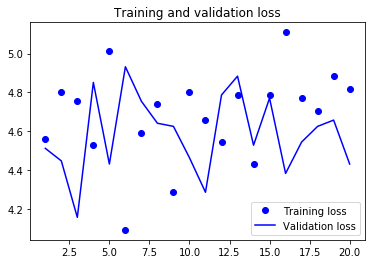

In [57]:
plot_training(logs[0].history['acc'], logs[0].history['val_acc'], logs[0].history['loss'], logs[0].history['val_loss'])

### MODEL 2 ---------------------------------------------------------

In [58]:
def model_2(lr, image_size):
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    
    model.add(Flatten())
    
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=lr), metrics=['acc'])        
    model.summary()    
    return model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 46, 46, 64)        18496     
_________________________________________________________________
flatten_7 (Flatten)          (None, 135424)            0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               17334400  
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 129       
Total params: 17,353,921
Trainable params: 17,353,921
Non-trainable params: 0
_________________________________________________________________


In [60]:
logs = train_model(model_2, lr=0.001, epochs=20, epoch_steps=20, valid_steps=20, batch_size=50, image_size=(50, 50))

Model training started...
Epoch 1/20
20/20 [==============================] - 2s 96ms/step - loss: 4.8383 - acc: 0.6670 - val_loss: 4.5131 - val_acc: 0.7200
Epoch 2/20
20/20 [==============================] - 1s 34ms/step - loss: 4.5937 - acc: 0.7150 - val_loss: 4.4486 - val_acc: 0.7240
Epoch 3/20
20/20 [==============================] - 1s 39ms/step - loss: 4.5614 - acc: 0.7170 - val_loss: 4.1585 - val_acc: 0.7420
Epoch 4/20
20/20 [==============================] - 1s 36ms/step - loss: 4.8515 - acc: 0.6990 - val_loss: 4.8515 - val_acc: 0.6990
Epoch 5/20
20/20 [==============================] - 1s 35ms/step - loss: 4.8354 - acc: 0.7000 - val_loss: 4.4325 - val_acc: 0.7250
Epoch 6/20
20/20 [==============================] - 1s 37ms/step - loss: 4.6742 - acc: 0.7100 - val_loss: 4.9321 - val_acc: 0.6940
Epoch 7/20
20/20 [==============================] - 1s 35ms/step - loss: 4.4388 - acc: 0.7246 - val_loss: 4.7548 - val_acc: 0.7050
Epoch 8/20
20/20 [==============================] - 1s 37

In [1]:
plot_training(logs[0].history['acc'], logs[0].history['val_acc'], logs[0].history['loss'], logs[0].history['val_loss'])

NameError: name 'plot_training' is not defined

### MODEL 3 ---------------------------------------------------------

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 46, 46, 64)        18496     
_________________________________________________________________
flatten_10 (Flatten)         (None, 135424)            0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               17334400  
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 129       
Total params: 17,353,921
Trainable params: 17,353,921
Non-trainable params: 0
_________________________________________________________________
Model training started...
Epoch 1/20
20/20 [==============================] - 2s 109ms/step - loss: 0.6119 - acc: 0.6800 - val_los

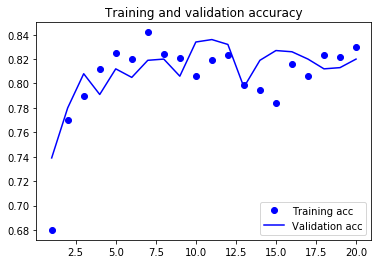

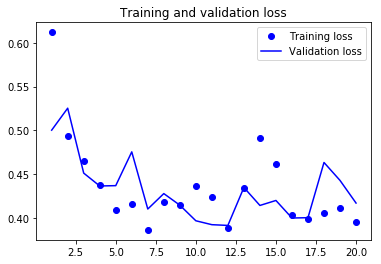

In [64]:
def model_3(lr, image_size):
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    
    model.add(Flatten())
    
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=lr), metrics=['acc'])        
    model.summary()    
    return model

In [ ]:
logs = train_model(model_3, lr=0.0001, epochs=20, epoch_steps=20, valid_steps=20, batch_size=50, image_size=(50, 50))

In [ ]:
plot_training(logs[0].history['acc'], logs[0].history['val_acc'], logs[0].history['loss'], logs[0].history['val_loss'])

### MODEL 4 ---------------------------------------------------------

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 46, 46, 64)        18496     
_________________________________________________________________
flatten_11 (Flatten)         (None, 135424)            0         
_________________________________________________________________
dense_21 (Dense)             (None, 128)               17334400  
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 129       
Total params: 17,353,921
Trainable params: 17,353,921
Non-trainable params: 0
_________________________________________________________________
Model training started...
Epoch 1/20
20/20 [==============================] - 2s 100ms/step - loss: 0.6056 - acc: 0.6970 - val_los

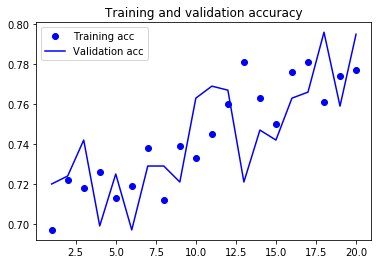

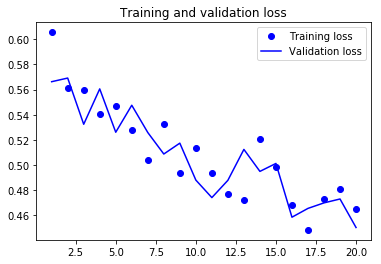

In [65]:
def model_4(lr, image_size):
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    
    model.add(Flatten())
    
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=lr), metrics=['acc'])        
    model.summary()    
    return model

In [ ]:
logs = train_model(model_4, lr=0.00001, epochs=20, epoch_steps=20, valid_steps=20, batch_size=50, image_size=(50, 50))

In [ ]:
plot_training(logs[0].history['acc'], logs[0].history['val_acc'], logs[0].history['loss'], logs[0].history['val_loss'])

### MODEL 5 ---------------------------------------------------------

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 46, 46, 64)        18496     
_________________________________________________________________
flatten_12 (Flatten)         (None, 135424)            0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               17334400  
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 129       
Total params: 17,353,921
Trainable params: 17,353,921
Non-trainable params: 0
_________________________________________________________________
Model training started...
Epoch 1/50
50/50 [==============================] - 3s 69ms/step - loss: 0.5864 - acc: 0.7040 - val_loss

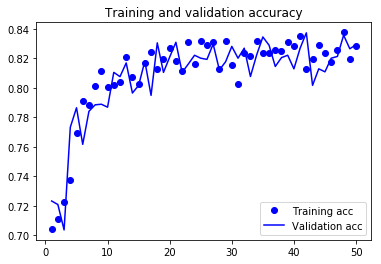

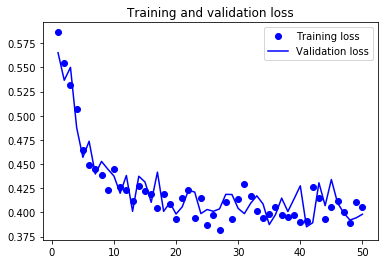

In [66]:
def model_5(lr, image_size):
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    
    model.add(Flatten())
    
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=lr), metrics=['acc'])        
    model.summary()    
    return model

In [ ]:
logs = train_model(model_5, lr=0.00001, epochs=50, epoch_steps=50, valid_steps=50, batch_size=50, image_size=(50, 50))

In [ ]:
plot_training(logs[0].history['acc'], logs[0].history['val_acc'], logs[0].history['loss'], logs[0].history['val_loss'])

### MODEL 6 ---------------------------------------------------------

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 46, 46, 64)        18496     
_________________________________________________________________
flatten_13 (Flatten)         (None, 135424)            0         
_________________________________________________________________
dense_25 (Dense)             (None, 128)               17334400  
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 129       
Total params: 17,353,921
Trainable params: 17,353,921
Non-trainable params: 0
_________________________________________________________________
Model training started...
Epoch 1/200
200/200 [==============================] - 9s 47ms/step - loss: 0.5036 - acc: 0.7497 - val_l

200/200 [==============================] - 7s 36ms/step - loss: 0.3478 - acc: 0.8487 - val_loss: 0.3587 - val_acc: 0.8422
Epoch 115/200
200/200 [==============================] - 7s 35ms/step - loss: 0.3573 - acc: 0.8456 - val_loss: 0.3546 - val_acc: 0.8467
Epoch 116/200
200/200 [==============================] - 7s 35ms/step - loss: 0.3458 - acc: 0.8527 - val_loss: 0.3665 - val_acc: 0.8415
Epoch 117/200
200/200 [==============================] - 7s 35ms/step - loss: 0.3563 - acc: 0.8463 - val_loss: 0.3563 - val_acc: 0.8468
Epoch 118/200
200/200 [==============================] - 7s 36ms/step - loss: 0.3514 - acc: 0.8460 - val_loss: 0.3559 - val_acc: 0.8452
Epoch 119/200
200/200 [==============================] - 7s 36ms/step - loss: 0.3511 - acc: 0.8503 - val_loss: 0.3674 - val_acc: 0.8416
Epoch 120/200
200/200 [==============================] - 7s 36ms/step - loss: 0.3508 - acc: 0.8496 - val_loss: 0.3586 - val_acc: 0.8435
Epoch 121/200
200/200 [==============================] - 7s 35

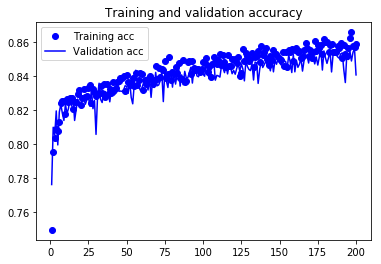

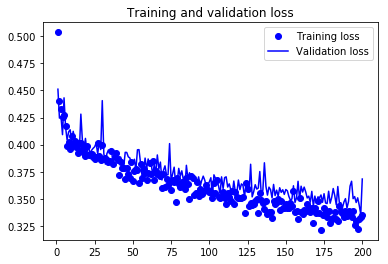

In [67]:
def model_6(lr, image_size):
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    
    model.add(Flatten())
    
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=lr), metrics=['acc'])        
    model.summary()    
    return model

In [ ]:
logs = train_model(model_6, lr=0.00001, epochs=200, epoch_steps=200, valid_steps=200, batch_size=50, image_size=(50, 50))

In [ ]:
plot_training(logs[0].history['acc'], logs[0].history['val_acc'], logs[0].history['loss'], logs[0].history['val_loss'])

### MODEL 7 ---------------------------------------------------------

In [ ]:
def model_7(lr, image_size):
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(image_size[0], image_size[1], 3)))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dropout(0.5))
    
    model.add(Dense(512, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=lr), metrics=['acc'])        
    model.summary()    
    return model

In [ ]:
logs = train_model(model_7, lr=0.001, epochs=40, epoch_steps=140, valid_steps=10, batch_size=60, image_size=(50, 50))

In [ ]:
plot_training(logs[0].history['acc'], logs[0].history['val_acc'], logs[0].history['loss'], logs[0].history['val_loss'])